In [1]:
!pip install bioservices

   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   ----- ---------------------------------- 0.5/3.8 MB 3.6 MB/s eta 0:00:01
   ---------- ----------------------------- 1.0/3.8 MB 2.5 MB/s eta 0:00:02
   ---------------- ----------------------- 1.6/3.8 MB 2.4 MB/s eta 0:00:01
   ---------------- ----------------------- 1.6/3.8 MB 2.4 MB/s eta 0:00:01
   ------------------- -------------------- 1.8/3.8 MB 1.7 MB/s eta 0:00:02
   ------------------------------ --------- 2.9/3.8 MB 2.3 MB/s eta 0:00:01
   ------------------------------ --------- 2.9/3.8 MB 2.3 MB/s eta 0:00:01
   -------------------------------- ------- 3.1/3.8 MB 1.8 MB/s eta 0:00:01
   ----------------------------------- ---- 3.4/3.8 MB 1.9 MB/s eta 0:00:01
   ---------------------------------------- 3.8/3.8 MB 1.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ------------------------- -------------- 1.0/1.6 MB 5.5 MB/s eta 0:00:01
   -----------------------


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
#Step 2 - Explore Files in the FTP Folder
from ftplib import FTP #library to interact with FTP servers.

def list_ftp_files(ftp_url):#Connects to EBI's FTP server
    ftp_host = "ftp.ebi.ac.uk"
    path = ftp_url.replace("ftp://ftp.ebi.ac.uk/", "")

    with FTP(ftp_host) as ftp:#Goes into each folder
        ftp.login()
        ftp.cwd(path)
        print(f"\n📁 Files in {ftp_url}:\n")
        ftp.retrlines('LIST')#Lists all files in a directory

# List files for each dataset
ftp_links = [
    "ftp://ftp.ebi.ac.uk/pub/databases/arrayexpress/data/experiment/GEOD/E-GEOD-7543/",
    "ftp://ftp.ebi.ac.uk/pub/databases/arrayexpress/data/experiment/MTAB/E-MTAB-3630/",
    "ftp://ftp.ebi.ac.uk/pub/databases/arrayexpress/data/experiment/MTAB/E-MTAB-3629/"
]

# List files in each FTP folder
for link in ftp_links:
    list_ftp_files(link)



📁 Files in ftp://ftp.ebi.ac.uk/pub/databases/arrayexpress/data/experiment/GEOD/E-GEOD-7543/:

-rwxr-xr-x    1 ftp      ftp          3841 Dec 23  2011 E-GEOD-7543.README.txt
-rwxr-xr-x    1 ftp      ftp          3807 Dec 23  2011 E-GEOD-7543.idf.txt
-rwxr-xr-x    1 ftp      ftp       2927136 Dec 23  2011 E-GEOD-7543.processed.1.zip
-rwxr-xr-x    1 ftp      ftp        111217 Dec 23  2011 E-GEOD-7543.sdrf.txt

📁 Files in ftp://ftp.ebi.ac.uk/pub/databases/arrayexpress/data/experiment/MTAB/E-MTAB-3630/:

-r--r--r--    1 ftp      ftp          4366 Jun 01  2016 E-MTAB-3630.idf.txt
-r--r--r--    1 ftp      ftp          4366 May 24  2016 E-MTAB-3630.idf.txt_original
-r--r--r--    1 ftp      ftp       6116215 Jun 08  2015 E-MTAB-3630.raw.1.zip
-rw-rw-r--    1 ftp      ftp          3397 Jun 08  2015 E-MTAB-3630.sdrf.txt

📁 Files in ftp://ftp.ebi.ac.uk/pub/databases/arrayexpress/data/experiment/MTAB/E-MTAB-3629/:

-r--r--r--    1 ftp      ftp          4263 Jun 01  2016 E-MTAB-3629.idf.txt
-r--r--

In [5]:
from ftplib import FTP
import os

# Define accessions and corresponding SDRF filenames
datasets = {
    "E-GEOD-7543": "E-GEOD-7543.sdrf.txt",
    "E-MTAB-3630": "E-MTAB-3630.sdrf.txt",
    "E-MTAB-3629": "E-MTAB-3629.sdrf.txt"
}

def download_ftp_file(accession, filename):#create a function to set up FTP paths
    # Set up FTP paths
    ftp_host = "ftp.ebi.ac.uk"
    ftp_base = "pub/databases/arrayexpress/data/experiment"
    
    # Get prefix (GEOD or MTAB) to build full folder path
    prefix = accession.split("-")[1][:4]
    ftp_folder = f"{ftp_base}/{prefix}/{accession}"
    
    # Create local directory if needed
    os.makedirs("downloads", exist_ok=True)
    local_path = f"downloads/{accession}_{filename}"

    with FTP(ftp_host) as ftp:
        ftp.login()
        ftp.cwd(ftp_folder)
        with open(local_path, "wb") as f:
            ftp.retrbinary(f"RETR {filename}", f.write)
            print(f"Downloaded: {accession} → {filename}")

# Loop through datasets and download SDRF files
for acc, file in datasets.items():
    try:
        download_ftp_file(acc, file)
    except Exception as e:
        print(f"Failed to download {file} for {acc}: {e}")


Downloaded: E-GEOD-7543 → E-GEOD-7543.sdrf.txt
Downloaded: E-MTAB-3630 → E-MTAB-3630.sdrf.txt
Downloaded: E-MTAB-3629 → E-MTAB-3629.sdrf.txt


In [9]:
#Step 4 - Open in jupyter
import pandas as pd

# Define list of file paths
sdrf_files = [
    "downloads/E-GEOD-7543_E-GEOD-7543.sdrf.txt",
    "downloads/E-MTAB-3630_E-MTAB-3630.sdrf.txt",
    "downloads/E-MTAB-3629_E-MTAB-3629.sdrf.txt"
]

# Load and preview each SDRF file
for file in sdrf_files:
    print(f"\nPreview of {file.split('/')[-1]}:\n" + "-"*60)
    try:
        df = pd.read_csv(file, sep="\t", low_memory=False)
        print(df.head(6))           # Print first 3 rows
        print("\nColumns:\n", df.columns.tolist())
    except Exception as e:
        print(f"Could not read {file}: {e}")



Preview of E-GEOD-7543_E-GEOD-7543.sdrf.txt:
------------------------------------------------------------
            Source Name Characteristics [Organism]  \
0  GSE7543GSM182769_Cy5               Homo sapiens   
1  GSE7543GSM182769_Cy3               Homo sapiens   
2  GSE7543GSM182784_Cy3               Homo sapiens   
3  GSE7543GSM182784_Cy5               Homo sapiens   
4  GSE7543GSM182796_Cy5               Homo sapiens   
5  GSE7543GSM182796_Cy3               Homo sapiens   

                                         Description Protocol REF  \
0  human whole blood collected into PAXgene RNA v...    P-G7543-1   
1  common reference sample compsed of total RNAs ...    P-G7543-1   
2  common reference sample compsed of total RNAs ...    P-G7543-1   
3  human whole blood collected into PAXgene RNA v...    P-G7543-1   
4  human whole blood collected into PAXgene RNA v...    P-G7543-1   
5  common reference sample compsed of total RNAs ...    P-G7543-1   

  Protocol REF.1              

In [10]:
for file in sdrf_files:
    print(f"\nColumns in {file.split('/')[-1]}:\n" + "-"*60)
    df = pd.read_csv(file, sep="\t", low_memory=False)
    for col in df.columns:
        print("•", col)



🔎 Columns in E-GEOD-7543_E-GEOD-7543.sdrf.txt:
------------------------------------------------------------
• Source Name
• Characteristics [Organism]
• Description
• Protocol REF
• Protocol REF.1
• Sample Name
• Protocol REF.2
• Extract Name
• Material Type
• Protocol REF.3
• Labeled Extract Name
• Label
• Material Type.1
• Protocol REF.4
• Hybridization Name
• Array Design REF
• Comment [Array Design URI]
• Protocol REF.5
• Scan Name
• Protocol REF.6
• Derived Array Data Matrix File
• Comment [Derived ArrayExpress FTP file]

🔎 Columns in E-MTAB-3630_E-MTAB-3630.sdrf.txt:
------------------------------------------------------------
• Source Name
• Characteristics[organism]
• Characteristics[cell line]
• Material Type
• Protocol REF
• Protocol REF.1
• Extract Name
• Protocol REF.2
• Labeled Extract Name
• Label
• Protocol REF.3
• Assay Name
• Technology Type
• Array Design REF
• Term Source REF
• Protocol REF.4
• Array Data File
• Comment [ArrayExpress FTP file]
• Factor Value[compoun

In [12]:
# See the unique values in the compound field for each dataset
for file in sdrf_files:
    df = pd.read_csv(file, sep="\t", low_memory=False)
    compound_cols = [col for col in df.columns if "compound" in col.lower()]
    if compound_cols:
        print(f"\nValues in {compound_cols[0]} from {file.split('/')[-1]}:")
        print(df[compound_cols[0]].unique())



Values in Factor Value[compound] from E-MTAB-3630_E-MTAB-3630.sdrf.txt:
['none' 'PM10' 'PM2.5']

Values in Factor Value[compound] from E-MTAB-3629_E-MTAB-3629.sdrf.txt:
['none' 'PM10' 'PM2.5']


In [14]:
import os

# List all files in the current directory
for file in os.listdir():
    print(file)


.ipynb_checkpoints
downloads
E-GEOD-7543
E-GEOD-7543.zip
Model1-Pollution-GeneExprssion.ipynb
Model1-Pollution-GeneExprssion1
Understand The Genetic Datasets.docx


In [15]:
import pandas as pd
import os

# Load the SDRF metadata file
metadata = pd.read_csv("C:/Users/emman/Downloads/PM2.5_Pollution_Data-Public/Scripts/Genetic_Data/downloads/E-MTAB-3630_E-MTAB-3630.sdrf.txt", sep="\t", low_memory=False)

# Check unique values for pollution
metadata['Factor Value[compound]'].value_counts()


Factor Value[compound]
none     3
PM10     3
PM2.5    3
Name: count, dtype: int64

In [16]:
import os

# Point to the folder where the gene expression file is
path = "C:/Users/emman/Downloads/PM2.5_Pollution_Data-Public/Scripts/Genetic_Data/downloads"

for file in os.listdir(path):
    print(file)


E-GEOD-7543_E-GEOD-7543.sdrf.txt
E-MTAB-3629_E-MTAB-3629.sdrf.txt
E-MTAB-3630_E-MTAB-3630.sdrf.txt


In [23]:
for col in metadata.columns:
    print(col)
[col for col in metadata.columns if 'Comment' in col or 'FTP' in col or 'URI' in col]


Source Name
Characteristics[organism]
Characteristics[cell line]
Material Type
Protocol REF
Protocol REF.1
Extract Name
Protocol REF.2
Labeled Extract Name
Label
Protocol REF.3
Assay Name
Technology Type
Array Design REF
Term Source REF
Protocol REF.4
Array Data File
Comment [ArrayExpress FTP file]
Factor Value[compound]


['Comment [ArrayExpress FTP file]']

In [28]:
from ftplib import FTP
import os

# FTP server and path info
ftp_server = "ftp.ebi.ac.uk"
ftp_path = "/pub/databases/microarray/data/experiment/MTAB/E-MTAB-3630/"
filename = "E-MTAB-3630.raw.1.zip"
download_folder = "./arrayexpress_E-MTAB-3630_files"

# Ensure the folder exists
os.makedirs(download_folder, exist_ok=True)
local_filepath = os.path.join(download_folder, filename)

# Connect and download
with FTP(ftp_server) as ftp:
    ftp.login()
    ftp.cwd(ftp_path)

    print(f"Downloading {filename} from {ftp_server}{ftp_path}")
    with open(local_filepath, "wb") as f:
        ftp.retrbinary(f"RETR {filename}", f.write)

print(f"Download complete: {local_filepath}")


Download complete: ./arrayexpress_E-MTAB-3630_files\E-MTAB-3630.raw.1.zip


In [29]:
import zipfile

with zipfile.ZipFile(local_filepath, 'r') as zip_ref:
    zip_ref.extractall(download_folder)

print("Unzipped contents into:", download_folder)


Unzipped contents into: ./arrayexpress_E-MTAB-3630_files


In [30]:
import os

for file in os.listdir(download_folder):
    print(file)


BEAS-PM2.5_3_miRNA-2_07_07_11.CEL
BEAS_C1_miRNA-2_0_07_07_11.CEL
BEAS_C2_miRNA-2_0_07_07_11.CEL
BEAS_C3_miRNA-2_0_07_07_11.CEL
BEAS_PM10_1_miRNA-2_0_06.07.11.CEL
BEAS_PM10_2_miRNA-2_0_06_07_11.CEL
BEAS_PM10_3_miRNA-2_0_06_07_11.CEL
BEAS_PM2.5_1_miRNA-2_0_06_07_11.CEL
BEAS_PM2.5_2_miRNA-2_07_07_11.CEL
E-MTAB-3630.raw.1.zip


In [33]:
pip install biopython

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
#This is the code i used on R to normalise the expression matrix
# Load required libraries
#if (!requireNamespace("BiocManager", quietly = TRUE)) {
  #install.packages("BiocManager")
#}
#BiocManager::install("affy")

#library(affy)

# Set your CEL folder manually if not running from command line
#input_dir <- "C:/Users/emman/Downloads/PM2.5_Pollution_Data-Public/Scripts/Genetic_Data/arrayexpress_E-MTAB-3630_files"  # adjust this if needed
#output_csv <- file.path(input_dir, "rma_normalised_expression_matrix.csv")

# Step 1: Read the CEL files
#data <- ReadAffy(celfile.path = input_dir)

# Step 2: Normalise using RMA
#exprs_matrix <- exprs(rma(data))

# Step 3: Save to CSV
#write.csv(exprs_matrix, file = output_csv)




In [ ]:
#I successfully normalised the microarray .CEL files and saved them as a RMA-normalised expression matrix (rma_normalised_expression_matrix.csv). 

#Now we will Load the expression Matrix in python for analysis of downstream 
#1)Quality checks

#2)Preprocessing

#3)Label assignment (pollution levels)

#4)Machine learning (pollution → gene expression)

In [47]:
import pandas as pd
import os

# Set your file path
csv_path = "C:/Users/emman/Downloads/PM2.5_Pollution_Data-Public/Scripts/Genetic_Data/arrayexpress_E-MTAB-3630_files/rma_normalised_expression_matrix.csv"

# Load the expression matrix
df = pd.read_csv(csv_path, index_col=0)

# Preview the data
print("Expression matrix loaded:")
print(df.shape)
print(df.head(10))


Expression matrix loaded:
(20706, 9)
            BEAS-PM2.5_3_miRNA-2_07_07_11.CEL  BEAS_C1_miRNA-2_0_07_07_11.CEL  \
1367452_st                           1.129690                        0.736411   
1367453_st                           1.098788                        1.057016   
1367454_st                           1.148708                        1.148708   
1367455_st                           0.950668                        0.950668   
1367456_st                           1.172968                        1.098710   
1367457_st                           1.290938                        1.239223   
1367458_st                           1.403321                        1.403321   
1367459_st                           1.072003                        1.072003   
1367460_st                           1.097941                        1.197889   
1367461_st                           0.950668                        0.950668   

            BEAS_C2_miRNA-2_0_07_07_11.CEL  BEAS_C3_miRNA-2_0_07_07_11.

0


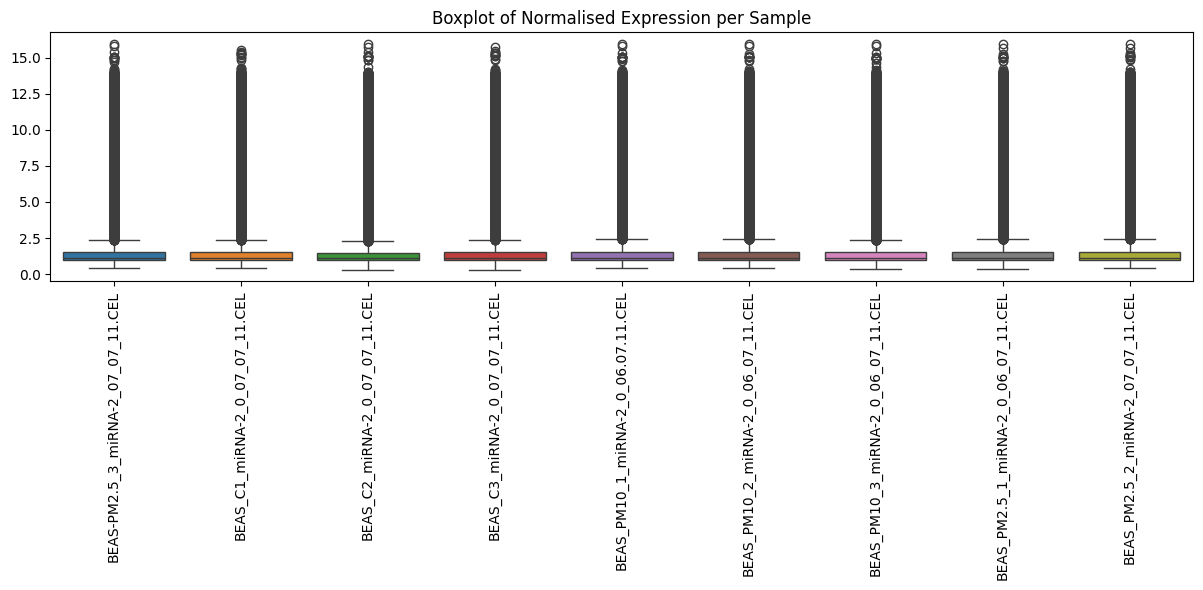

In [40]:
# Check for any missing values
print(df.isnull().sum().sum())  # should be 0 for a clean matrix

# Visualize distribution across all samples
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Boxplot of Normalised Expression per Sample")
plt.tight_layout()
plt.show()


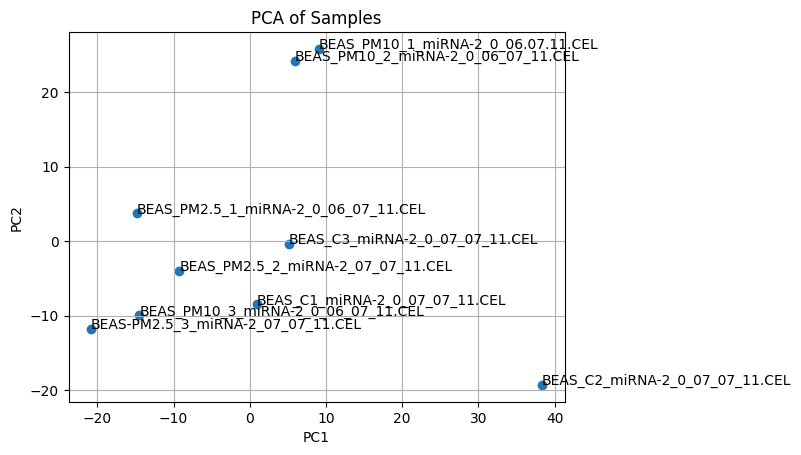

In [41]:
#PCA to check sample similarity
from sklearn.decomposition import PCA
import numpy as np

# Transpose to shape (samples, genes)
X = df.T.values#this transposes the gene expression matrix so rows represent samples and columns represent genes
pca = PCA(n_components=2)#make the PCA into a 2 principal component for 2D visualization
X_pca = pca.fit_transform(X)#get the pca and transform the data into 2D space 

plt.scatter(X_pca[:, 0], X_pca[:, 1)#Plot the sample into the PCA space 
for i, name in enumerate(df.columns):#go through the colume dataframe
    plt.annotate(name, (X_pca[i, 0], X_pca[i, 1]))#Label each axies with its sample name
plt.title("PCA of Samples")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid()
plt.show()


In [42]:
# step 2 : Preprocessing
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(df.T)  # shape: (samples, genes)


In [56]:
#Step 3 : Assign Labels (Pollution Groups)
import numpy as np

# Create pollution category labels
sample_labels = []
for col in df.columns:
    if "PM2.5" in col:
        sample_labels.append("PM2.5")
    elif "PM10" in col:
        sample_labels.append("PM10")
    elif "C" in col:
        sample_labels.append("Control")
    else:
        sample_labels.append("Unknown")

print(sorted(sample_labels))
# Output: ['Control', 'Control', 'PM10', 'PM2.5']

['Control', 'Control', 'Control', 'PM10', 'PM10', 'PM10', 'PM2.5', 'PM2.5', 'PM2.5']


In [61]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(sample_labels)  # PM2.5=2, PM10=1, Control=0
#print(list(zip(df.columns, y)))

sorted_columns = sorted(zip(df.columns, y), key=lambda x: x[1])
print(sorted_columns)


[('BEAS_C1_miRNA-2_0_07_07_11.CEL', np.int64(0)), ('BEAS_C2_miRNA-2_0_07_07_11.CEL', np.int64(0)), ('BEAS_C3_miRNA-2_0_07_07_11.CEL', np.int64(0)), ('BEAS_PM10_1_miRNA-2_0_06.07.11.CEL', np.int64(1)), ('BEAS_PM10_2_miRNA-2_0_06_07_11.CEL', np.int64(1)), ('BEAS_PM10_3_miRNA-2_0_06_07_11.CEL', np.int64(1)), ('BEAS-PM2.5_3_miRNA-2_07_07_11.CEL', np.int64(2)), ('BEAS_PM2.5_1_miRNA-2_0_06_07_11.CEL', np.int64(2)), ('BEAS_PM2.5_2_miRNA-2_07_07_11.CEL', np.int64(2))]


In [72]:
#Step 4 : ML Model (Pollution → Gene Expression) from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Input = expression matrix, Transposed
X = df.T.values  # shape: (samples, genes)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=le.classes_))

#From this we will get model performance (accuracy, precision, recall by class
#We will also get feature importances - which genes most contribute to pollution class prediction

              precision    recall  f1-score   support

     Control       1.00      1.00      1.00         1
        PM10       0.50      1.00      0.67         1
       PM2.5       0.00      0.00      0.00         1

    accuracy                           0.67         3
   macro avg       0.50      0.67      0.56         3
weighted avg       0.50      0.67      0.56         3



C:\Users\emman\Downloads\Personal_File\University_of_Bradford\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\emman\Downloads\Personal_File\University_of_Bradford\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\emman\Downloads\Personal_File\University_of_Bradford\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beha

In [68]:
# Print all genes with their importance scores
importances = model.feature_importances_
all_genes = df.index
for gene, score in zip(all_genes, importances):
    print(f"{gene}: {score:.4f}")

# Sorted by importance
sorted_indices = np.argsort(importances)[::-1]
for idx in sorted_indices:
    print(f"{all_genes[idx]}: {importances[idx]:.4f}")


1367452_st: 0.0000
1367453_st: 0.0000
1367454_st: 0.0000
1367455_st: 0.0000
1367456_st: 0.0000
1367457_st: 0.0000
1367458_st: 0.0000
1367459_st: 0.0000
1367460_st: 0.0000
1367461_st: 0.0000
1367462_st: 0.0000
1367463_st: 0.0000
1367464_st: 0.0000
1367465_st: 0.0000
1367466_st: 0.0000
1367467_st: 0.0000
1367468_st: 0.0000
1367469_st: 0.0000
1367470_st: 0.0000
1367471_st: 0.0000
1367472_st: 0.0000
1367473_st: 0.0000
1367474_st: 0.0000
1367475_st: 0.0000
1367476_st: 0.0000
1367477_st: 0.0000
1367478_st: 0.0000
1367479_st: 0.0000
1367480_st: 0.0000
1367481_st: 0.0000
1367482_st: 0.0000
1367483_st: 0.0000
1367484_st: 0.0000
1367485_st: 0.0000
1367486_st: 0.0000
1367487_st: 0.0000
1367488_st: 0.0000
1367489_st: 0.0000
1367490_st: 0.0000
1367491_st: 0.0000
1367492_st: 0.0000
1367493_st: 0.0000
1367494_st: 0.0000
1367495_st: 0.0000
1367496_st: 0.0000
1367497_st: 0.0000
1367498_st: 0.0000
1367499_st: 0.0000
1367500_st: 0.0000
1367501_st: 0.0000
1367502_st: 0.0000
1367503_st: 0.0000
1367504_st: 

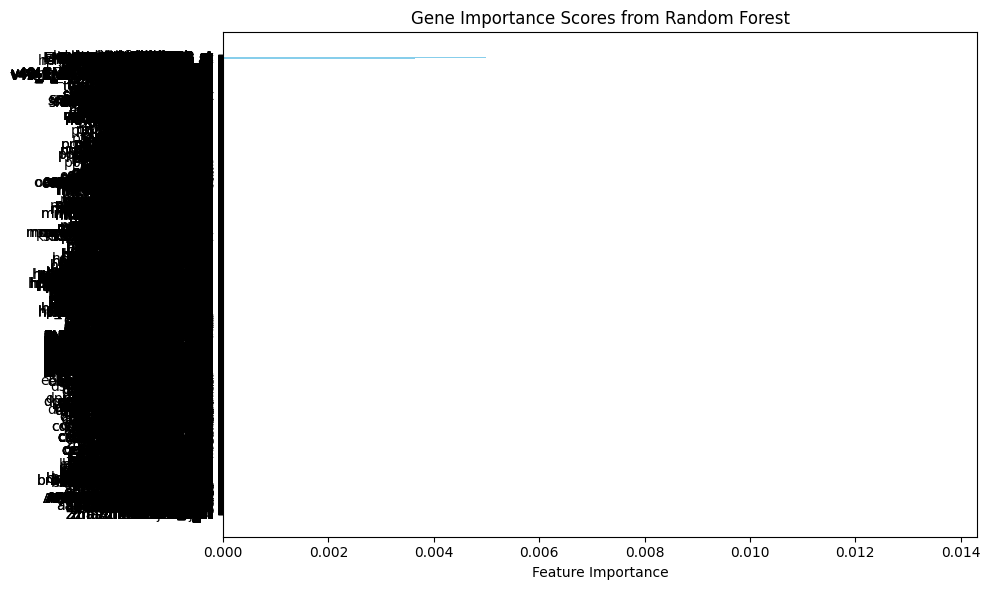

In [70]:
import matplotlib.pyplot as plt
import numpy as np

# Get all gene names and their importance scores
importances = model.feature_importances_
genes = df.index

# Sort by importance
sorted_indices = np.argsort(importances)[::-1]
sorted_genes = genes[sorted_indices]
sorted_importances = importances[sorted_indices]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(sorted_genes, sorted_importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.title("Gene Importance Scores from Random Forest")
plt.gca().invert_yaxis()  # Highest importance at the top
plt.tight_layout()
plt.show()


In [63]:
# Top 20 most informative genes
importances = model.feature_importances_
top_gene_indices = np.argsort(importances)[-20:]
top_genes = df.index[top_gene_indices]
print("Top 20 predictive genes:")
print(top_genes)

Top 20 predictive genes:
Index(['hsa-miR-520e_st', 'lmi-miR-10_st', 'mml-miR-378_st', 'xtr-miR-31_st',
       'hp_hsa-mir-548f-4_x_st', 'ppt-miR390a_st', 'hp_hsa-mir-23a_x_st',
       'hp_mmu-mir-92b_st', 'ppy-miR-1304_st', 'ppa-miR-196_st',
       'lgi-miR-133_st', 'hp_rno-mir-16_st', 'ebv-miR-BART21-3p_st',
       'ppy-miR-137_st', 'sla-miR-106b_st', 'hp_mmu-mir-486_st',
       'dvi-miR-14_st', 'gga-miR-1632_st', 'hsa-miR-623_st',
       'lgi-miR-1993_st'],
      dtype='object')


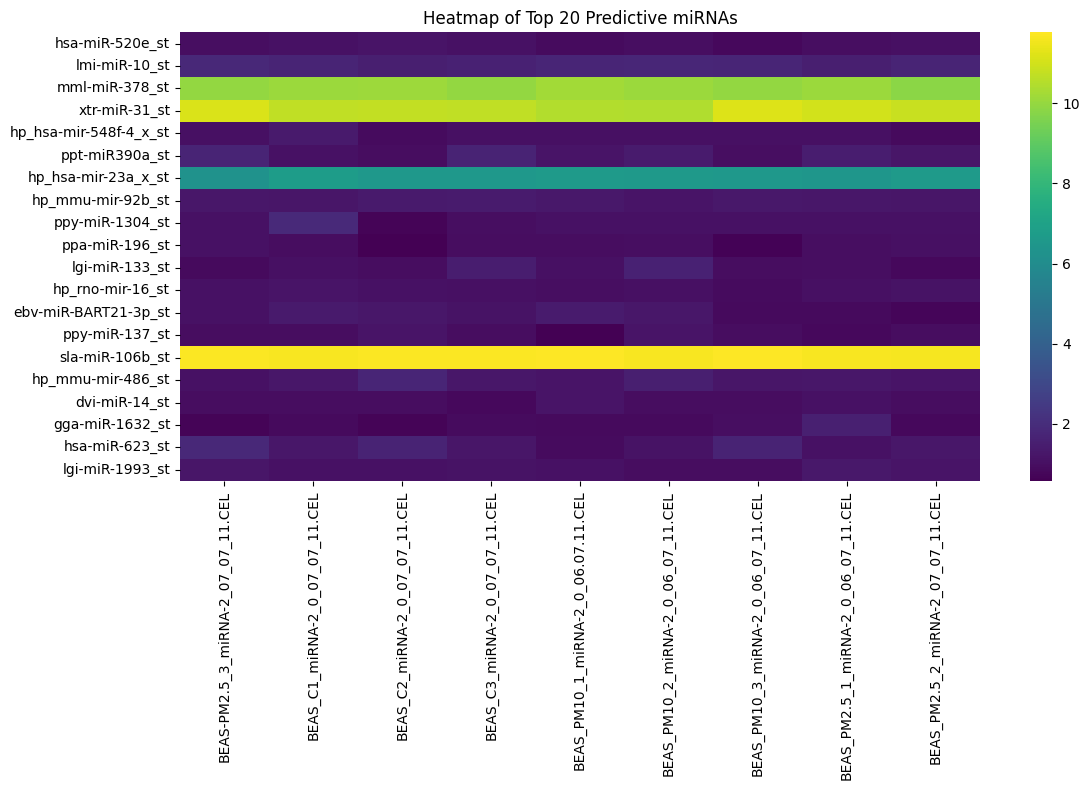

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

top_genes = ['hsa-miR-520e_st', 'lmi-miR-10_st', 'mml-miR-378_st', 'xtr-miR-31_st',
             'hp_hsa-mir-548f-4_x_st', 'ppt-miR390a_st', 'hp_hsa-mir-23a_x_st',
             'hp_mmu-mir-92b_st', 'ppy-miR-1304_st', 'ppa-miR-196_st',
             'lgi-miR-133_st', 'hp_rno-mir-16_st', 'ebv-miR-BART21-3p_st',
             'ppy-miR-137_st', 'sla-miR-106b_st', 'hp_mmu-mir-486_st',
             'dvi-miR-14_st', 'gga-miR-1632_st', 'hsa-miR-623_st',
             'lgi-miR-1993_st']

# Extract expression of top genes
subset = df.loc[top_genes]

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(subset, cmap="viridis", xticklabels=True, yticklabels=True)
plt.title("Heatmap of Top 20 Predictive miRNAs")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [ ]:
#top_hsa = [gene for gene in top_genes if 'hsa-' in gene or 'hsa' in gene]
#pd.Series(top_hsa).to_csv("top_human_miRNAs.csv", index=False)


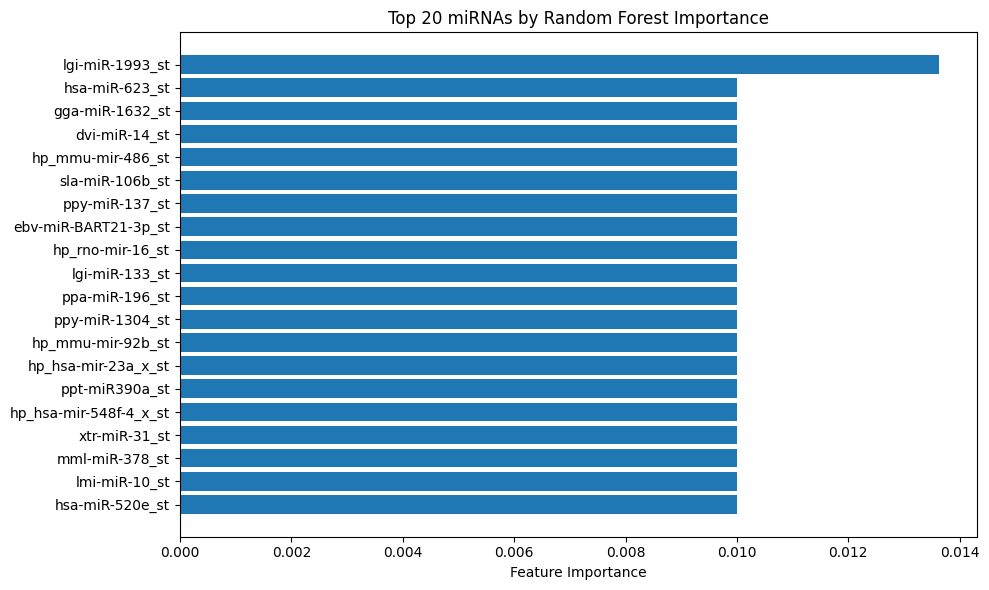

In [71]:
import numpy as np

importances = model.feature_importances_
top_indices = np.argsort(importances)[-20:]
top_scores = importances[top_indices]
top_names = df.index[top_indices]

plt.figure(figsize=(10, 6))
plt.barh(range(len(top_names)), top_scores, align='center')
plt.yticks(range(len(top_names)), top_names)
plt.xlabel('Feature Importance')
plt.title('Top 20 miRNAs by Random Forest Importance')
plt.tight_layout()
plt.show()
